In [85]:
import numpy as np
import pandas as pd

#dataset import
xtrain=pd.read_excel(r'C:\Users\fhasan1\input_118.xlsx')
ytrain=pd.read_excel(r'C:\Users\fhasan1\target_118.xlsx')

In [86]:
#Changing pandas dataframe to numpy array
X = xtrain.to_numpy()
y = ytrain.to_numpy()

In [87]:
#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [89]:
model = Sequential()
model.add(Dense(128, input_dim=215, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(118, activation='softmax'))

In [90]:
import keras.backend as K
def custom_binary_crossentropy(y_true,y_pred):
    t_loss = (-1)*1000*(y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))
    return K.mean(t_loss)

In [91]:
model.compile(loss=custom_binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, epochs=100, batch_size=500,verbose=0,validation_split=0.2)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


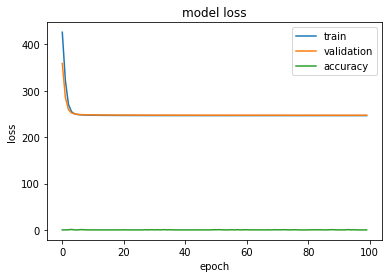

In [93]:
print(history.history.keys())
# "Loss"

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'accuracy'], loc='upper right')
plt.show()

In [94]:
y_pred=model.predict(X_test)

In [95]:
#from sklearn.metrics import confusion_matrix
#y_test=np.reshape(y_test,600*118)
#y_pred=np.reshape(y_pred,600*118)

#confusion_matrix(y_test, y_pred)

In [96]:
#For sigmoid
#Sigmoid gives fractional output

from sklearn.metrics import confusion_matrix

y_test=np.reshape(y_test,600*118)
y_pred=np.reshape(y_pred,600*118)

y_pred_temp=[]
for x in y_pred:
    if x>0.01:
        y_pred_temp.append(1)
    else:
        y_pred_temp.append(0)
        
confusion_matrix(y_test, y_pred_temp)

array([[62298,  1831],
       [  102,  6569]], dtype=int64)

In [97]:
#For sigmoid
#Sigmoid gives fractional output

from sklearn.metrics import confusion_matrix

y_test=np.reshape(y_test,600*118)
y_pred=np.reshape(y_pred,600*118)

y_pred_temp=[]
for x in y_pred:
    if x>0.001:
        y_pred_temp.append(1)
    else:
        y_pred_temp.append(0)
        
confusion_matrix(y_test, y_pred_temp)

array([[60598,  3531],
       [    2,  6669]], dtype=int64)

In [ ]:
import keras.backend as K
def custom_binary_crossentropy(y_true,y_pred):
    t_loss = (-1)*(y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))
    return K.mean(t_loss)

In [ ]:
import keras.backend as K

def customLoss(yTrue,yPred):
    return K.sum(K.log(yTrue) - K.log(yPred))

In [ ]:
import keras.backend as K

def binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight):

    TN = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 0)
    TP = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 1)

    FP = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 1)
    FN = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 0)

    # Converted as Keras Tensors
    TN = K.sum(K.variable(TN))
    FP = K.sum(K.variable(FP))

    specificity = TN / (TN + FP + K.epsilon())
    recall = TP / (TP + FN + K.epsilon())

    return 1.0 - (recall_weight*recall + spec_weight*specificity)

# Our custom loss' wrapper
def custom_loss(recall_weight, spec_weight):

    def recall_spec_loss(y_true, y_pred):
        return binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight)

    # Returns the (y_true, y_pred) loss function
    return recall_spec_loss

In [ ]:
# converting list to numpy array 
arr = numpy.array(lst)
# converting numpy array to list
an_array = np.array([4, 5, 6])
print(an_array.tolist())

In [ ]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12],[1,3,5,7],[2,4,6,8]])
print(arr)
np.delete(arr, [1,2], 0)

In [2]:
import numpy as np
arr = np.array([[1,2,3,4], [5,6,7,8], [0,0,0,0],[1,3,5,7],[2,4,6,8]])
mask_array = arr[:, 0] ==0  # comparing values of the first column
arr=arr[~mask_array]  # ~ is an element-wise inversion
print(arr)

[[1 2 3 4]
 [5 6 7 8]
 [1 3 5 7]
 [2 4 6 8]]
